-----Naive Bayes Model Evaluation-----
Accuracy Score: 83.33%

Confusion Matrix:
[[2 0]
 [1 3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



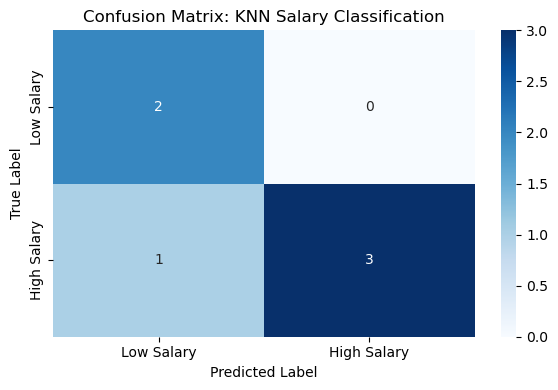

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load dataset
df = pd.read_csv('C:\\Users\\acer\\OneDrive\\Documents\\Data\\Salary_Data.csv')

# Data Transformation
median_salary = df['Salary'].median()
df['Salary_Class'] = (df['Salary'] > median_salary).astype(int)

# Features and Target
x = df[['YearsExperience']].values
y = df['Salary_Class'].values

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##Implementing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

# Predictions
y_pred = nb_model.predict(x_test)

# Evaluation
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("-----Naive Bayes Model Evaluation-----")
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap="Blues",
    xticklabels=['Low Salary', 'High Salary'],
    yticklabels=['Low Salary', 'High Salary']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: KNN Salary Classification')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()